<center> <h1>LoL-Model </h1> </center>
<center> <h2>Predicting wins in League of Legends</h2> </center>
<h3>Executive summary</h3>

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam metus tellus, rhoncus a arcu id, molestie tempus nisl. Aliquam in turpis eget arcu volutpat pellentesque. Vestibulum aliquet ante ultricies, accumsan justo et, euismod diam. Suspendisse non nunc at odio lacinia imperdiet. Phasellus non lacus dapibus dui porttitor gravida ut id ante. Pellentesque in blandit leo. Vestibulum auctor mauris sit amet libero consequat, ut viverra mi imperdiet. Pellentesque nec ornare quam.

# Data preparation

## Libraries

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' %x)

## Data import

In [2]:
# Champions and ID
champions = pd.read_csv('data/champs.csv')

# Matches
matches = pd.read_csv('data/matches.csv')

# Player info
playersInfo = pd.read_csv('data/participants.csv')

# Stats
stat1 = pd.read_csv('data/stats1.csv', low_memory=False)
stat2 = pd.read_csv('data/stats2.csv', low_memory=False)
stats = stat1.append(stat2)

# Team - bans
bannedChampion = pd.read_csv('data/teambans.csv')

# Team - stats 
teamStats = pd.read_csv('data/teamstats.csv')

In [3]:
## Create the players table

# Merge player id with their stats
players = pd.merge(playersInfo, stats, on = ['id'], how = 'left', suffixes=('', '_y'))

# Add the champion name
players = pd.merge(players, champions, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))

# Add the match technical info
players = pd.merge(players, matches, how = 'left', left_on = 'matchid', right_on = 'id', suffixes=('', '_y'))

# Add 1-5 players to team 1, 6-10 to team 2
players['team'] = players['player'].apply(lambda x: 1 if x <= 5 else 2)

In [4]:
players.head()

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood,name,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version,team
0,9,10,1,19,4,11,NONE,JUNGLE,0.00,3748.00,2003.00,3111.00,3053.00,1419.00,1042.00,3340.00,6.00,10.00,1.00,2.00,2.00,2.00,643.00,2.00,0.00,0.00,0.00,0.00,96980.00,25154.00,65433.00,6392.00,0.00,9101.00,3975.00,4237.00,888.00,15160.00,1.00,23998.00,1826.00,1170.00,14.00,0.00,41446.00,13270.00,24957.00,3218.00,10497.00,10275.00,0.00,0.00,42.00,69.00,42.00,27.00,610.00,13.00,0.00,0,10.00,0.00,0.00,Warwick,19,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.00,2301.00,3111.00,3190.00,3107.00,0.00,0.00,3364.00,0.00,2.00,12.00,0.00,0.00,0.00,1116.00,0.00,0.00,0.00,0.00,0.00,25995.00,17633.00,6295.00,2066.00,0.00,8478.00,6684.00,977.00,816.00,11707.00,5.00,9402.00,1943.00,1852.00,30.00,0.00,17769.00,7945.00,7688.00,2136.00,9496.00,7975.00,1.00,0.00,17.00,1.00,1.00,0.00,211.00,14.00,1.00,0,17.00,3.00,0.00,Nami,267,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.00,1055.00,3072.00,3006.00,3031.00,3046.00,1036.00,3340.00,7.00,8.00,5.00,5.00,2.00,1.00,584.00,2.00,0.00,0.00,0.00,0.00,171568.00,1725.00,169576.00,266.00,1042.00,14425.00,331.00,14070.00,24.00,2283.00,2.00,16612.00,5094.00,2128.00,26.00,0.00,25627.00,12538.00,11094.00,1993.00,13136.00,11775.00,0.00,0.00,205.00,3.00,1.00,2.00,182.00,14.00,1.00,0,13.00,5.00,0.00,Draven,119,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
3,12,10,4,114,12,4,SOLO,TOP,0.00,1029.00,3078.00,3156.00,1001.00,3053.00,0.00,3340.00,5.00,11.00,2.00,2.00,1.00,1.00,300.00,0.00,0.00,0.00,0.00,0.00,113721.00,989.00,109563.00,3168.00,455.00,15267.00,296.00,11802.00,3168.00,4252.00,1.00,27174.00,8263.00,8263.00,5.00,0.00,31705.00,10280.00,19506.00,1918.00,11006.00,10683.00,3.00,0.00,164.00,6.00,6.00,0.00,106.00,15.00,0.00,0,3.00,0.00,0.00,Fiora,114,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
4,13,10,5,112,4,3,SOLO,MID,0.00,3020.00,1058.00,3198.00,3102.00,1052.00,1026.00,3340.00,2.00,8.00,2.00,0.00,1.00,0.00,504.00,0.00,0.00,0.00,0.00,0.00,185302.00,166671.00,16867.00,1763.00,0.00,18229.00,17925.00,28.00,275.00,1525.00,1.00,14616.00,3801.00,1724.00,15.00,0.00,20585.00,6850.00,11119.00,2615.00,11439.00,10485.00,1.00,0.00,235.00,4.00,3.00,1.00,159.00,15.00,0.00,0,10.00,0.00,0.00,Viktor,112,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1


In [6]:
# Drop columns
columnsToDrop = ['id', 'matchid', 'championid', 'ss1', 'ss2', 'version', 'team', 'wardsbought', 'id_y', 'gameid', 'queueid']
players.drop(columns = columnsToDrop, inplace = True, errors = 'ignore')

# Drop the 3 rows
players = players.dropna()

# Change floats to ints
for col in players.columns:
    if isinstance(players[col][1], float):
        players[col] = players[col].astype('int64')

# Remove cancelled matches
players = players.query("duration > 100")

# Trimming outliers
players.loc[players.kills > 20, 'players'] = 20
players.loc[players.deaths > 15, 'deaths'] = 15
players.loc[players.assists > 30, 'assists'] = 30

# Changing variables to binary
players.loc[players.doublekills > 1,'doublekills'] = 1
players.loc[players.triplekills > 1,'triplekills'] = 1
players.loc[players.quadrakills > 1,'quadrakills'] = 1
players.loc[players.pentakills > 1,'pentakills'] = 1
players.loc[players.legendarykills > 1,'legendarykills'] = 1

In [10]:
# Do usunięcia na koniec
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834517 entries, 0 to 1834519
Data columns (total 63 columns):
player                    int64
role                      object
position                  object
win                       int64
item1                     int64
item2                     int64
item3                     int64
item4                     int64
item5                     int64
item6                     int64
trinket                   int64
kills                     int64
deaths                    int64
assists                   int64
largestkillingspree       int64
largestmultikill          int64
killingsprees             int64
longesttimespentliving    int64
doublekills               int64
triplekills               int64
quadrakills               int64
pentakills                int64
legendarykills            int64
totdmgdealt               int64
magicdmgdealt             int64
physicaldmgdealt          int64
truedmgdealt              int64
largestcrit          

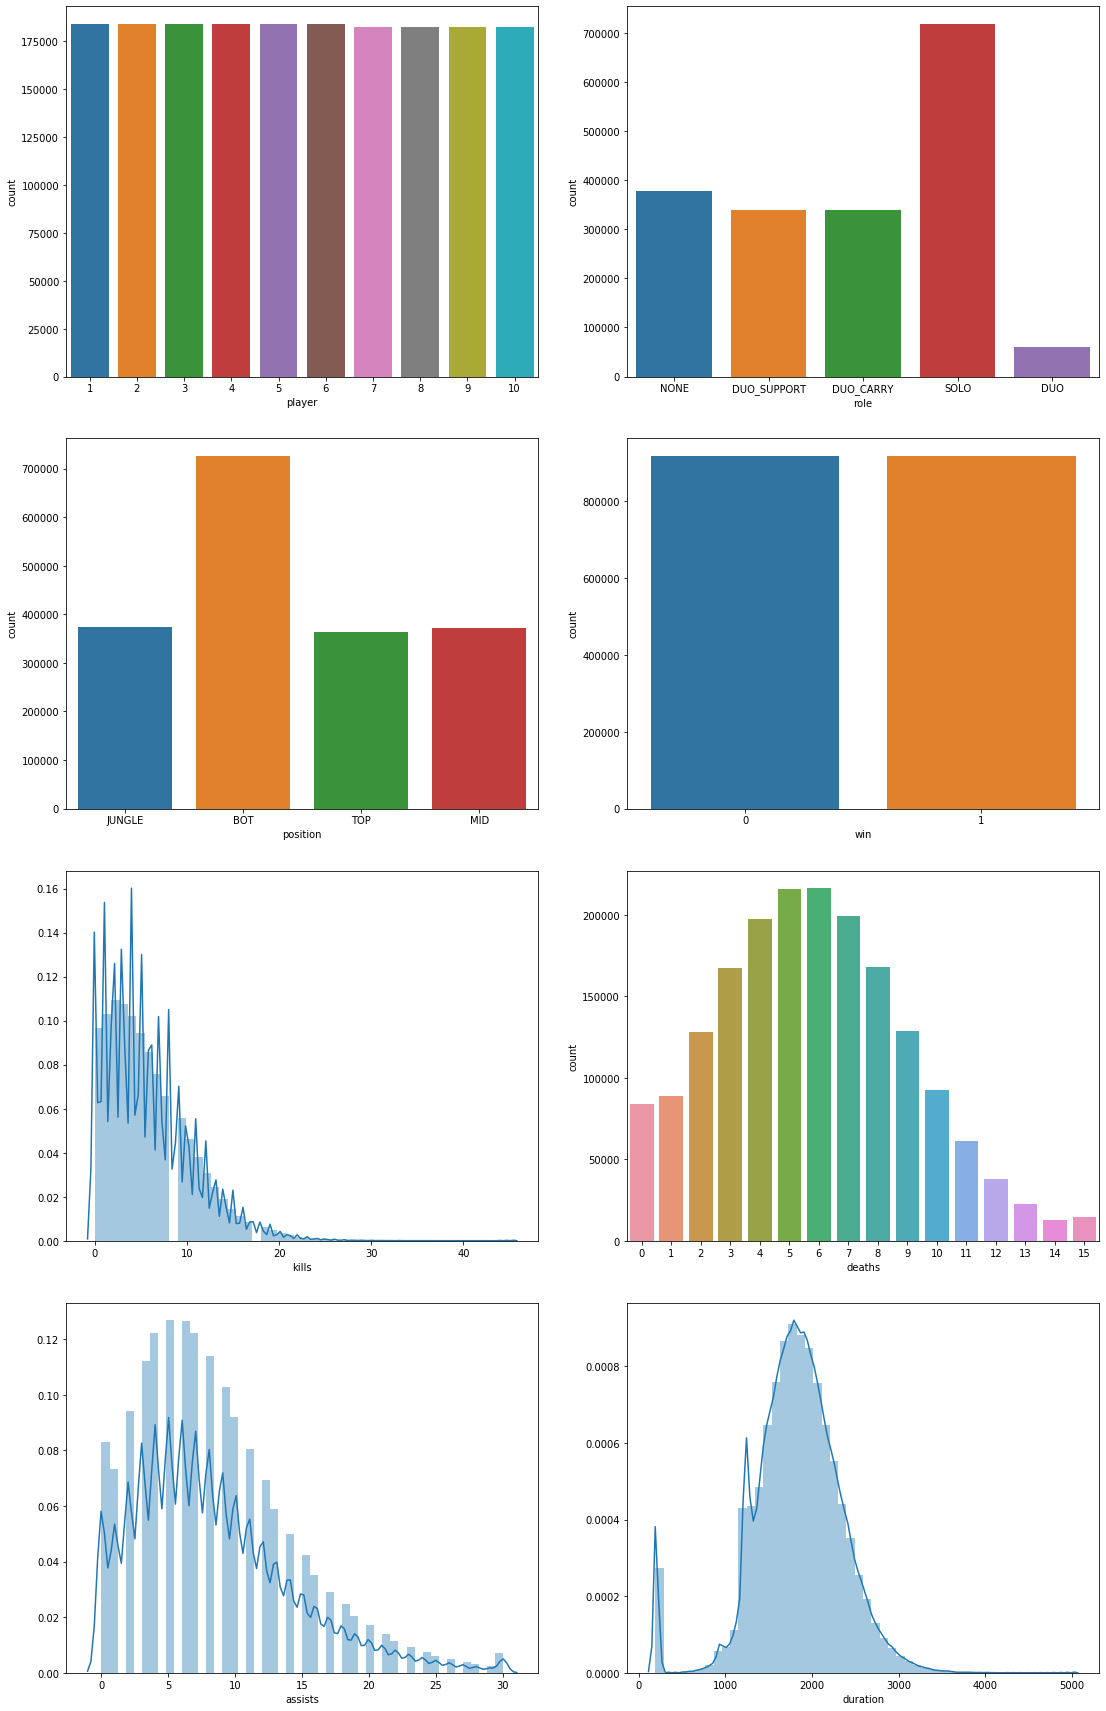

In [7]:
# Let's take a look at the distribution of all variables
fig = plt.figure(figsize=(16,120))

cols = ('player',
        'role',
        'position',
        'win',
        'kills',
        'deaths',
        'assists',
        'duration')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

In [15]:
correlationValues = players.corr()

In [19]:
correlationValues['win']

player                   -0.02
win                       1.00
item1                     0.04
item2                     0.05
item3                     0.06
item4                     0.09
item5                     0.12
item6                     0.12
trinket                   0.05
kills                     0.26
deaths                   -0.37
assists                   0.31
largestkillingspree       0.31
largestmultikill          0.21
killingsprees             0.23
longesttimespentliving    0.11
doublekills               0.19
triplekills               0.13
quadrakills               0.06
pentakills                0.03
legendarykills            0.00
totdmgdealt               0.01
magicdmgdealt             0.04
physicaldmgdealt          0.09
truedmgdealt              0.00
largestcrit               0.08
totdmgtochamp             0.14
magicdmgtochamp           0.06
physdmgtochamp            0.10
truedmgtochamp            0.06
totheal                   0.11
totunitshealed            0.04
dmgselfm

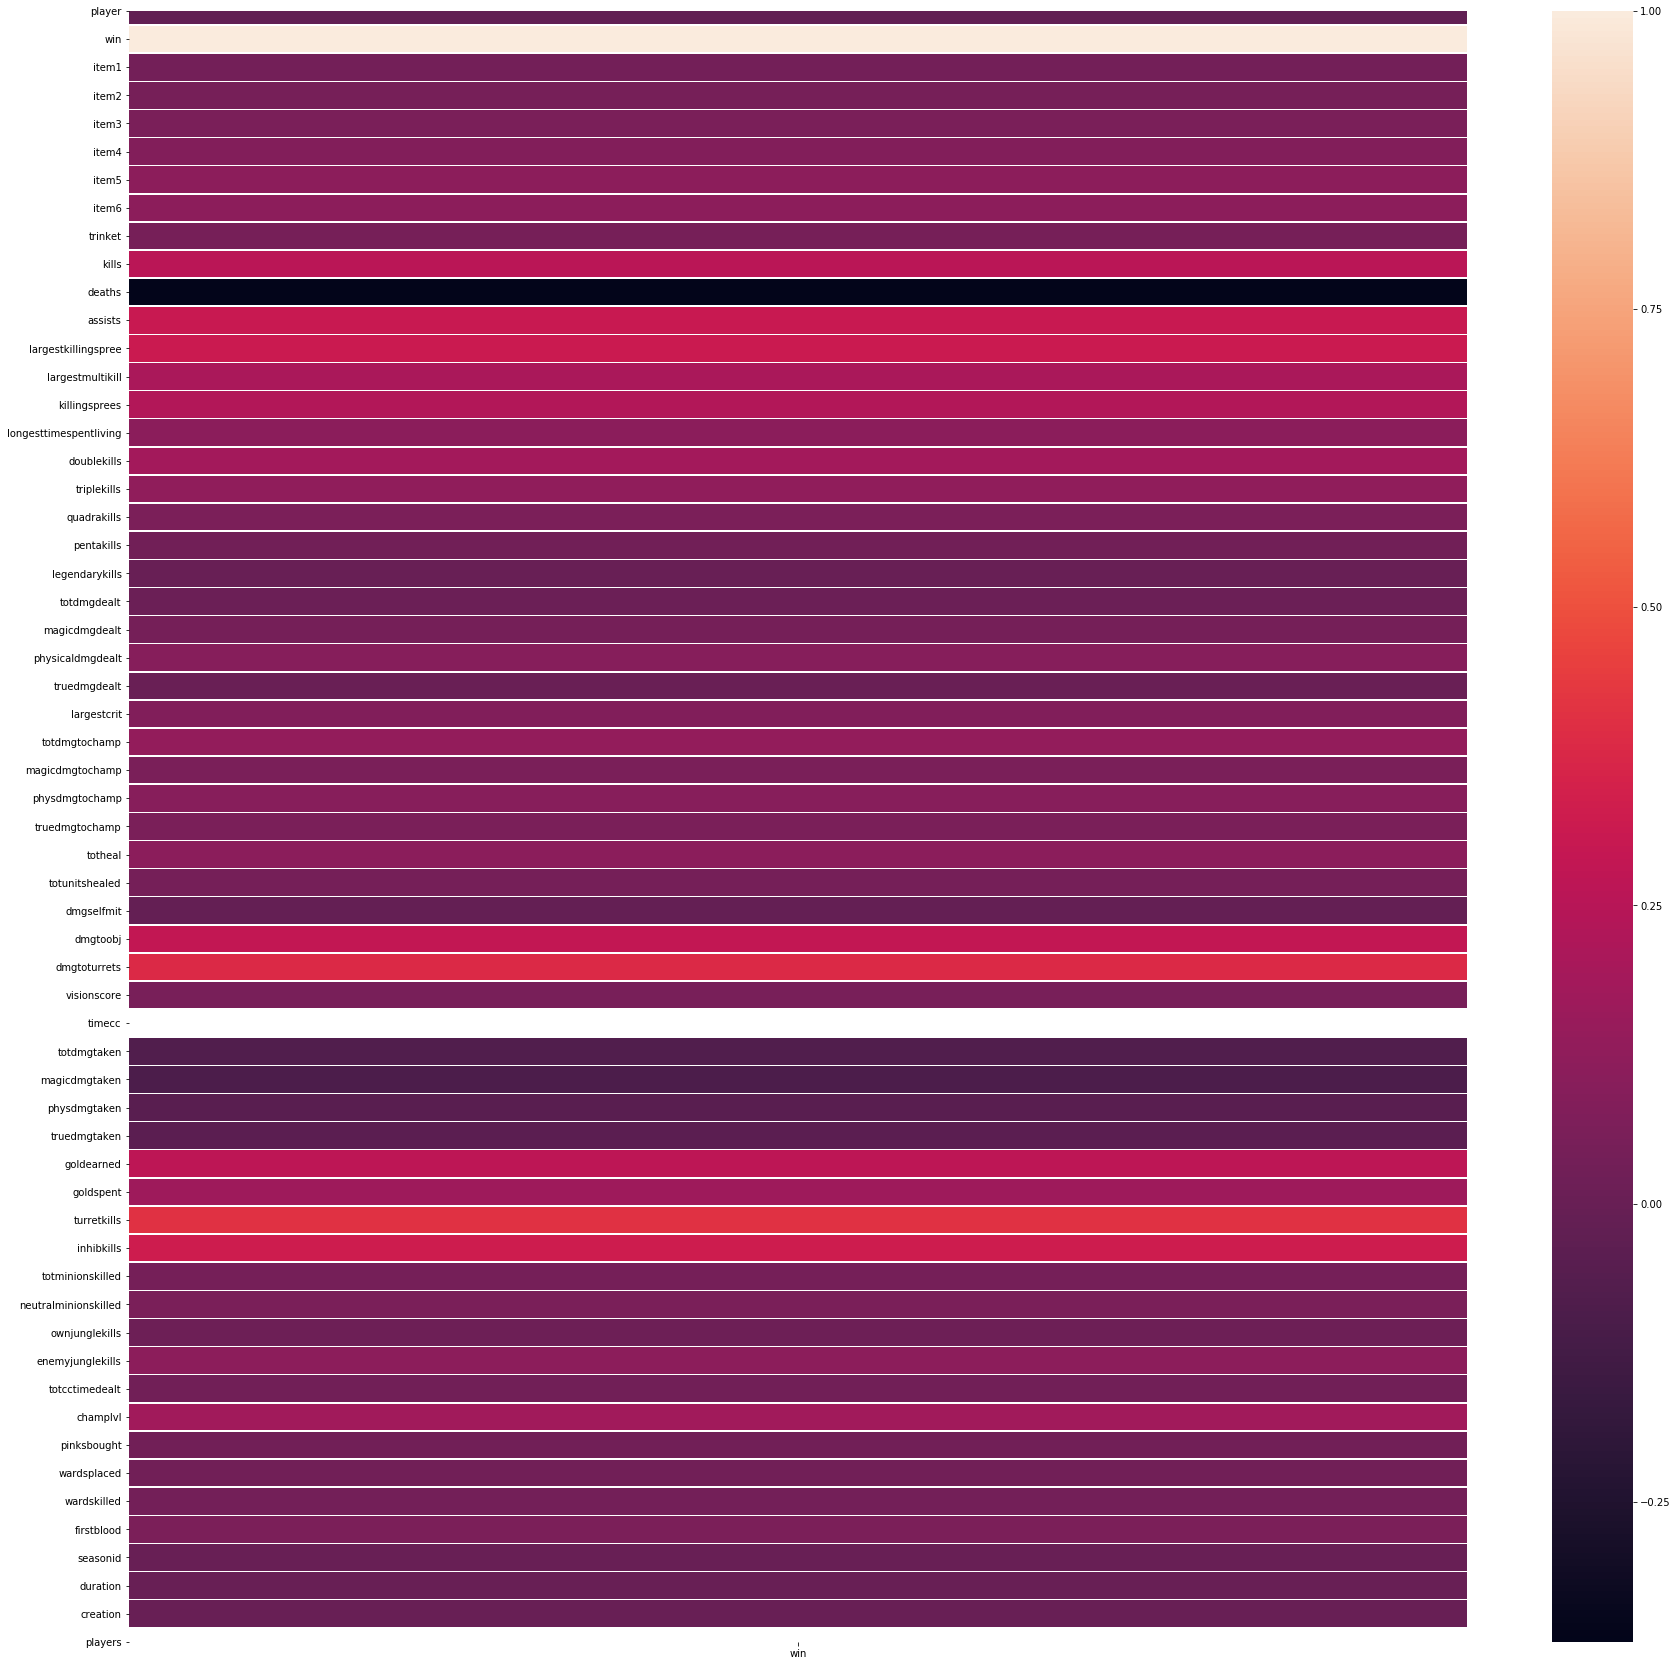

In [22]:
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(pd.DataFrame(correlationValues), linewidths=.5, fmt= '.1f',ax=ax)
plt.show()